## Basic imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ps
from datetime import datetime

In [3]:
DATA_PAth = "C:/Users/acer/Desktop/Global EV Charging stations data/ev_stations_2025.csv"
df = pd.read_csv(DATA_PAth, low_memory = False)
df.head()

,id,title,address,town,state,postcode,country,lat,lon,operator,status,num_connectors,connector_types,date_added
0,462769,Electra - Wambrechies - Volfoni,81 Av. Clément Ader,Wambrechies,NaN,59118,FR,50.685653,3.062410,Electra,Operational,2,CCS (Type 2)|Type 2 (Socket Only),2025-11-02 09:58:00+00:00
1,462768,Electra - Tourcoing - Action,185 rue du Touquet,Tourcoing,NaN,59200,FR,50.723171,3.180636,Electra,Operational,3,CCS (Type 2)|CHAdeMO|Type 2 (Socket Only),2025-11-02 09:55:00+00:00
2,462767,Electra - Bondues - Sure Hotel by Best Western...,3 Av. Henri Becquerel,Bondues,NaN,59910,FR,50.722535,3.129496,Electra,Operational,2,CCS (Type 2)|Type 2 (Socket Only),2025-11-02 09:50:00+00:00
3,462766,Electra - Bousbecque - Intermarché,Rue Auger,Bousbecque,NaN,59166,FR,50.770139,3.083454,Electra,Operational,2,CCS (Type 2)|Type 2 (Socket Only),2025-11-02 09:46:00+00:00
4,462765,Electra - Halluin - Intermarché,Boulevard de Roncq,Halluin,NaN,59250,FR,50.769938,3.124030,Electra,Operational,2,CCS (Type 2)|Type 2 (Socket Only),2025-11-02 09:42:00+00:00


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   title            10000 non-null  object 
 2   address          9999 non-null   object 
 3   town             9797 non-null   object 
 4   state            7131 non-null   object 
 5   postcode         8330 non-null   object 
 6   country          10000 non-null  object 
 7   lat              10000 non-null  float64
 8   lon              10000 non-null  float64
 9   operator         9402 non-null   object 
 10  status           10000 non-null  object 
 11  num_connectors   10000 non-null  int64  
 12  connector_types  9995 non-null   object 
 13  date_added       10000 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB


In [5]:
df.describe()


,id,lat,lon,num_connectors
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,416572.240600,42.425898,-52.399215,1.456500
std,40129.224879,14.651593,63.942829,0.989851
min,374562.000000,-43.904364,-159.356940,0.000000
25%,378741.750000,42.017013,-112.697935,1.000000
50%,384381.500000,45.778014,-73.441045,1.000000
75%,459627.250000,48.673134,-0.361442,2.000000
max,462769.000000,68.377358,174.756158,26.000000


In [6]:
df.head()

,id,title,address,town,state,postcode,country,lat,lon,operator,status,num_connectors,connector_types,date_added
0,462769,Electra - Wambrechies - Volfoni,81 Av. Clément Ader,Wambrechies,NaN,59118,FR,50.685653,3.062410,Electra,Operational,2,CCS (Type 2)|Type 2 (Socket Only),2025-11-02 09:58:00+00:00
1,462768,Electra - Tourcoing - Action,185 rue du Touquet,Tourcoing,NaN,59200,FR,50.723171,3.180636,Electra,Operational,3,CCS (Type 2)|CHAdeMO|Type 2 (Socket Only),2025-11-02 09:55:00+00:00
2,462767,Electra - Bondues - Sure Hotel by Best Western...,3 Av. Henri Becquerel,Bondues,NaN,59910,FR,50.722535,3.129496,Electra,Operational,2,CCS (Type 2)|Type 2 (Socket Only),2025-11-02 09:50:00+00:00
3,462766,Electra - Bousbecque - Intermarché,Rue Auger,Bousbecque,NaN,59166,FR,50.770139,3.083454,Electra,Operational,2,CCS (Type 2)|Type 2 (Socket Only),2025-11-02 09:46:00+00:00
4,462765,Electra - Halluin - Intermarché,Boulevard de Roncq,Halluin,NaN,59250,FR,50.769938,3.124030,Electra,Operational,2,CCS (Type 2)|Type 2 (Socket Only),2025-11-02 09:42:00+00:00


In [7]:
df.isnull().sum()

id                    0
title                 0
address               1
town                203
state              2869
postcode           1670
country               0
lat                   0
lon                   0
operator            598
status                0
num_connectors        0
connector_types       5
date_added            0
dtype: int64

In [9]:
(df.isnull().sum() / len(df)) * 100

id                  0.00
title               0.00
address             0.01
town                2.03
state              28.69
postcode           16.70
country             0.00
lat                 0.00
lon                 0.00
operator            5.98
status              0.00
num_connectors      0.00
connector_types     0.05
date_added          0.00
dtype: float64

In [11]:
df['address'].fillna('Not Mentioned',inplace = True)
df['town'].fillna('Unknown', inplace=True)
df['state'].fillna('Unknown', inplace=True)
df['operator'].fillna('Unknown', inplace=True)
df['connector_types'].fillna('Unknown Operator', inplace=True)



In [12]:
df.isnull().sum()

id                 0
title              0
address            0
town               0
state              0
postcode           0
country            0
lat                0
lon                0
operator           0
status             0
num_connectors     0
connector_types    0
date_added         0
dtype: int64

In [13]:
df.drop_duplicates(subset='id', inplace=True)

In [14]:
country_map = {
    'FR': 'France', 'ES': 'Spain', 'IT': 'Italy', 'US': 'United States', 
    'IN': 'India', 'CA': 'Canada', 'DE': 'Germany', 'GB': 'United Kingdom',
    # add more as needed
}

df['country'] = df['country'].map(country_map).fillna(df['country'])


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   title            10000 non-null  object 
 2   address          10000 non-null  object 
 3   town             10000 non-null  object 
 4   state            10000 non-null  object 
 5   postcode         10000 non-null  object 
 6   country          10000 non-null  object 
 7   lat              10000 non-null  float64
 8   lon              10000 non-null  float64
 9   operator         10000 non-null  object 
 10  status           10000 non-null  object 
 11  num_connectors   10000 non-null  int64  
 12  connector_types  10000 non-null  object 
 13  date_added       10000 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB


In [16]:
df.to_csv("desktop/ev_stations_cleaned.csv", index=False)


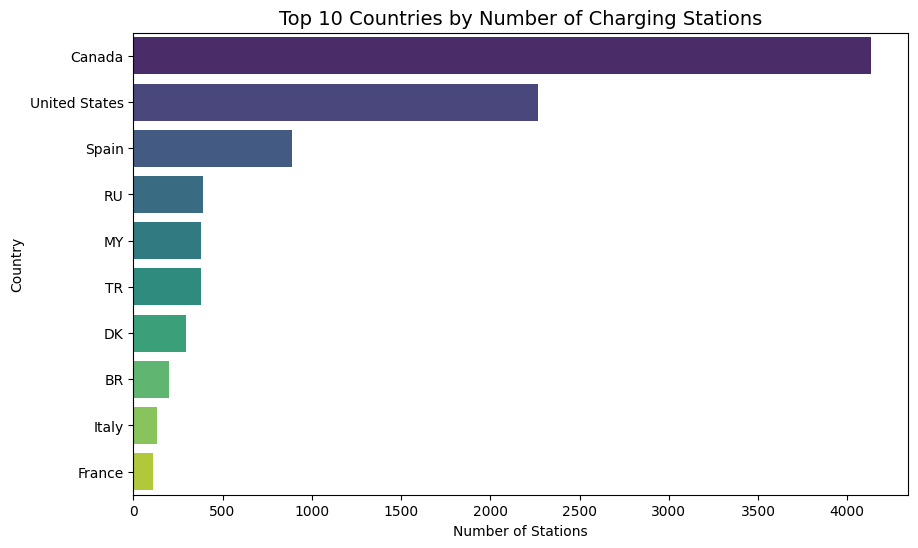

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

top_countries = df['country'].value_counts().head(10).reset_index()
top_countries.columns = ['country', 'station_count']

plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, x='station_count', y='country', hue='country', palette='viridis', legend=False)

plt.title('Top 10 Countries by Number of Charging Stations', fontsize=14)
plt.xlabel('Number of Stations')
plt.ylabel('Country')
plt.show()


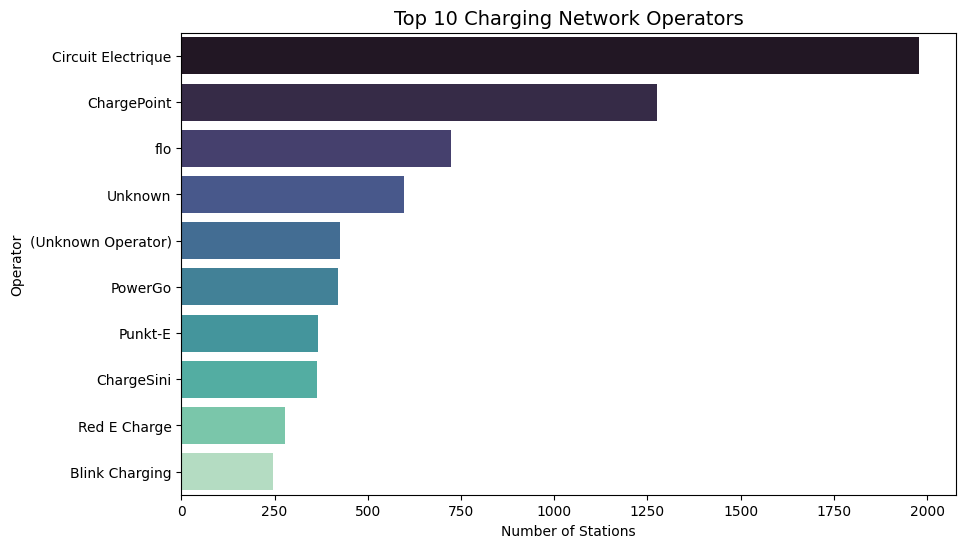

In [25]:
top_operators = df['operator'].value_counts().head(10).reset_index()
top_operators.columns = ['operator', 'station_count']

plt.figure(figsize=(10,6))
sns.barplot(data=top_operators, x='station_count', y='operator', hue='operator', palette='mako', legend=False)

plt.title('Top 10 Charging Network Operators', fontsize=14)
plt.xlabel('Number of Stations')
plt.ylabel('Operator')
plt.show()



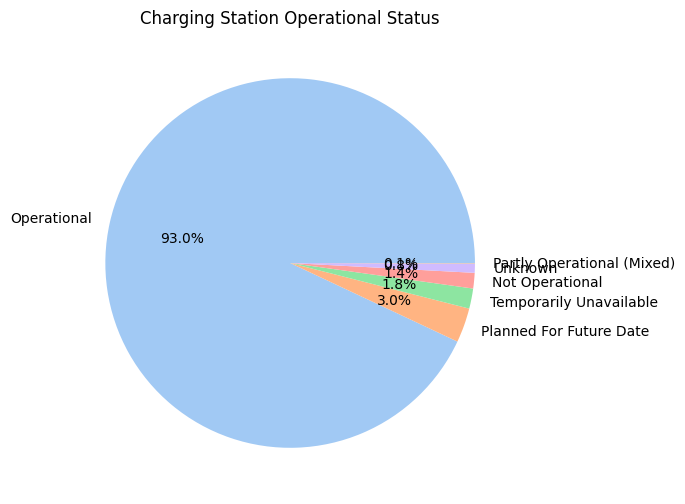

In [26]:
plt.figure(figsize=(6,6))
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Charging Station Operational Status')
plt.ylabel('')
plt.show()


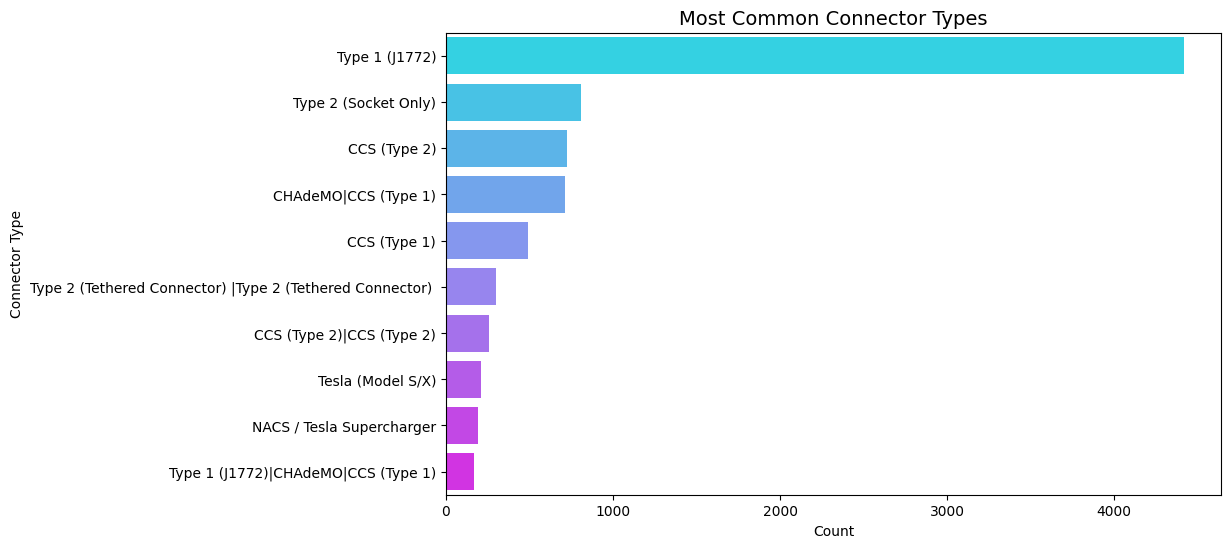

In [27]:
connector_counts = df['connector_types'].value_counts().head(10).reset_index()
connector_counts.columns = ['connector_type', 'count']

plt.figure(figsize=(10,6))
sns.barplot(data=connector_counts, x='count', y='connector_type', hue='connector_type', palette='cool', legend=False)

plt.title('Most Common Connector Types', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Connector Type')
plt.show()
